<a href="https://colab.research.google.com/github/Pvcunha/introducao-ciencia-dados/blob/main/introducao_ciencia_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airline Passenger Satisfaction

## Lendo dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.shape

(103904, 25)

## Preprocessing data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Podemos perceber algumas coias a partir dessas informações:
* Arrival Delay in Minutes possui 310 valores faltando.
* As primeiras duas colunas não servem para o nosso contexto.
* Possuímos várias colunas categoricas, tanto numéricas como com Int64.  


In [ ]:
df = df.drop(columns=['Unnamed: 0', 'id'])

In [ ]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Convertendo para tipo categorico todas as colunas exceto, `Age, Flight Distance, Departure Delay in Minutes, Arrival Delay In Minutes, Satisfaction`

In [ ]:
except_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']

In [ ]:
# Não existe uma forma de fazer inplace pelo pandas
for col in df.columns:
  if col not in except_columns:
    df[col] = df[col].astype('category')
  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

Describe the information of numerical type

In [ ]:
df.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


Descreve informação dos tipos categóricos

In [ ]:
df.describe(include=['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179


### Tratando dados faltantes

Substituimos os dados faltantes pela mediana da coluna para não descartarmos as linhas.

In [ ]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), axis=0)

In [ ]:
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### Normalização e discretização dos dados

Separando os dados categoricos e numéricos.

In [ ]:
numerical_df = df._get_numeric_data().copy()
categorical_df = df.select_dtypes(include=['category']).copy()

#### Normalização de features quantitativas

In [ ]:
numerical_df.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1)).fit_transform(numerical_df)
scaled_numerical_df = pd.DataFrame(scaler, columns=numerical_df.columns)

In [ ]:
scaled_numerical_df.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,-0.169751,-0.532129,-0.981387,-0.980892
std,0.387563,0.402725,0.048029,0.048800
min,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.487179,-0.845315,-1.000000,-1.000000
50%,-0.153846,-0.672052,-1.000000,-1.000000
75%,0.128205,-0.308562,-0.984925,-0.983586
max,1.000000,1.000000,1.000000,1.000000


#### Lidando com dados categóricos

Divideremos em dados features binárias e multivaloradas

In [ ]:
binary_cols = [col for col in categorical_df.columns if len(categorical_df[col].unique()) == 2]
nonbinary_cols = [col for col in categorical_df.columns if col not in binary_cols]

In [ ]:
binary_df = categorical_df[binary_cols]
binary_df.describe(include=['category'])

,Gender,Customer Type,Type of Travel
count,103904,103904,103904
unique,2,2,2
top,Female,Loyal Customer,Business travel
freq,52727,84923,71655


Vamos binarizar as colunas

In [ ]:
from sklearn.preprocessing import LabelEncoder

binary_df = binary_df.apply(LabelEncoder().fit_transform)

In [ ]:
binary_df.head(5)

,Gender,Customer Type,Type of Travel
0,1,0,1
1,1,1,0
2,0,0,0
3,0,0,0
4,1,0,0


Agora vamos fazer o one hot encoding para as outras colunas categoricas multivaloradas

In [ ]:
nonbinary_df = categorical_df[nonbinary_cols]
nonbinary_df.describe(include=['category'])

,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179


In [ ]:
dummies_nonbinary_df = pd.get_dummies(nonbinary_df)

In [ ]:
dummies_nonbinary_df.head(5)

,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


### Removendo outliers em dados numéricos

#### Abordagem z-score

O z-score mede a distancia que um valor está longe da média do seu conjunto. para detecção de outliers é utilizado um valor de normalmente +/- 3

In [ ]:
from scipy import stats
isoutliers = np.abs(stats.zscore(numerical_df) < 3).all(axis=1)
numerical_df['outliers_zscore'] = np.multiply(isoutliers, 1)

In [ ]:
numerical_df.head(5)

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,outliers_zscore
0,13,460,25,18.0,1
1,25,235,1,6.0,1
2,26,1142,0,0.0,1
3,25,562,11,9.0,1
4,61,214,0,0.0,1


In [ ]:
numerical_df[numerical_df['outliers_zscore'] == 0]

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,outliers_zscore
168,49,578,162,179.0,0
178,42,1372,141,125.0,0
278,40,1959,209,191.0,0
282,26,406,149,138.0,0
340,25,1796,176,164.0,0
...,...,...,...,...,...
103770,38,2940,233,223.0,0
103812,28,814,212,212.0,0
103832,49,639,225,222.0,0
103843,42,1076,171,156.0,0


#### Abordagem multivariada (Elliptic Envelope)

In [ ]:
from sklearn.covariance import EllipticEnvelope
detector = EllipticEnvelope(contamination=0.01)
detector.fit(numerical_df)

EllipticEnvelope(contamination=0.01)

In [ ]:
scores = detector.predict(numerical_df)

In [ ]:
scores

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
numerical_df['outliers_multi'] = scores

In [ ]:
numerical_df.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,outliers_zscore,outliers_multi
0,13,460,25,18.0,1,1
1,25,235,1,6.0,1,1
2,26,1142,0,0.0,1,1
3,25,562,11,9.0,1,1
4,61,214,0,0.0,1,1


In [ ]:
numerical_df[numerical_df['outliers_multi'] == -1]

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,outliers_zscore,outliers_multi
278,40,1959,209,191.0,0,-1
404,25,1258,199,185.0,0,-1
582,16,2899,220,212.0,0,-1
603,37,107,232,241.0,0,-1
665,16,1325,243,226.0,0,-1
...,...,...,...,...,...,...
103707,57,282,204,202.0,0,-1
103770,38,2940,233,223.0,0,-1
103812,28,814,212,212.0,0,-1
103832,49,639,225,222.0,0,-1


## Visualização dos dados e analise descritiva

### *Cálculos*



In [ ]:
data_summary = numerical_df.describe().T.rename_axis('column_name').reset_index()
data_train = df.copy()

 **Calculating IQR**

In [ ]:
data_summary['iqr'] = data_summary['75%'] - data_summary['25%']

**Calculating Skewness and Kurtosis**

In [ ]:
data_train_skewness =  pd.DataFrame(numerical_df.skew(skipna = True).rename_axis('column_name').reset_index().rename(columns = {0:'skewness'}))
data_train_kurtosis = pd.DataFrame(numerical_df.kurtosis(skipna = True).rename_axis('column_name').reset_index().rename(columns = {0:'skewness'}))
data_train_kurtosis

,column_name,skewness
0,Age,-0.719568
1,Flight Distance,0.268535
2,Departure Delay in Minutes,100.267006
3,Arrival Delay in Minutes,94.770144
4,outliers_zscore,35.567052
5,outliers_multi,94.922428


**Adicionando esses calculos ao sumario**



In [ ]:
data_summary = data_summary.merge(data_train_skewness, on = 'column_name').merge(data_train_kurtosis, on = 'column_name')
data_summary

,column_name,count,mean,std,min,25%,50%,75%,max,iqr,skewness_x,skewness_y
0,Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0,24.0,-0.004516,-0.719568
1,Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0,1329.0,1.109466,0.268535
2,Departure Delay in Minutes,103904.0,14.815618,38.230901,0.0,0.0,0.0,12.0,1592.0,12.0,6.733980,100.267006
3,Arrival Delay in Minutes,103904.0,15.133392,38.649776,0.0,0.0,0.0,13.0,1584.0,13.0,6.605288,94.770144
4,outliers_zscore,103904.0,0.975333,0.155109,0.0,1.0,1.0,1.0,1.0,0.0,-6.129141,35.567052
5,outliers_multi,103904.0,0.979982,0.199089,-1.0,1.0,1.0,1.0,1.0,0.0,-9.844826,94.922428


### **Data visualization**

Pegando informações sobre as variáveis categoricas 

In [ ]:
df.describe(include = ['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179


Olhando para razão dos valores da variável target 

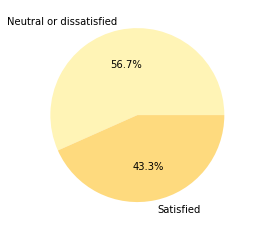

In [ ]:
plt.pie(df.satisfaction.value_counts(),labels = ["Neutral or dissatisfied","Satisfied"],colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

Como pode ser visto, a seleção é mais ou menos balanceada.

Agora calculando a correlação em matriz

In [ ]:
corr_mat = df.corr()
corr_mat

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,-0.010152,-0.012105
Flight Distance,0.099461,1.000000,0.002158,-0.002470
Departure Delay in Minutes,-0.010152,0.002158,1.000000,0.960247
Arrival Delay in Minutes,-0.012105,-0.002470,0.960247,1.000000


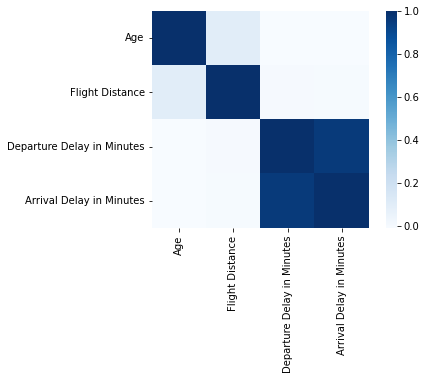

In [ ]:
sns.heatmap(corr_mat, square = True, cmap = 'Blues')
pass

É notorio uma forte correlação entre Departure delay in minutes' and 'Arrival delay in minutes'.Onde o coeficiente de correlação é:

In [ ]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)

Departure Delay in Minutes  Arrival Delay in Minutes    0.960247
dtype: float64

Plotando agora o scatterplot para essas variáveis.

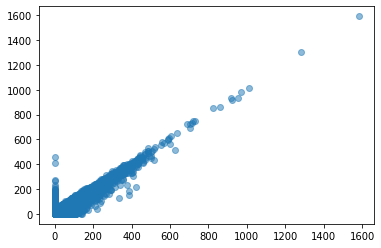

In [ ]:
plt.scatter(df['Arrival Delay in Minutes'], df['Departure Delay in Minutes'], alpha = 0.5)
pass

A dependência do atraso da hora de chegada em relação ao atraso da hora de partida é linear.



Considerando a razão de valores para cada variável categórica.

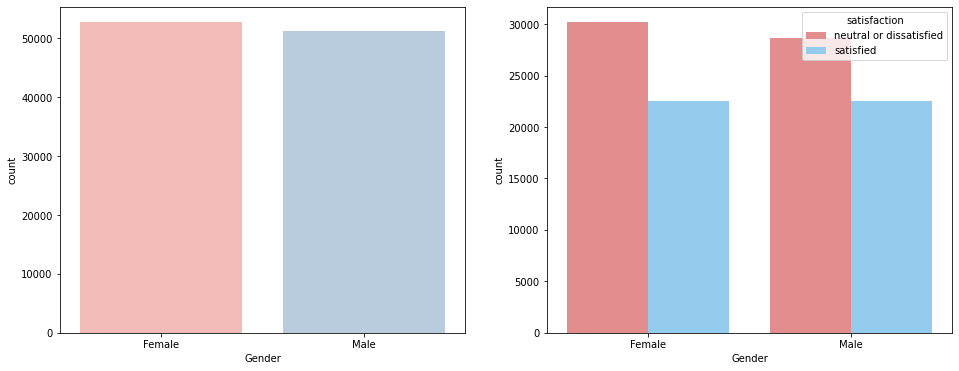

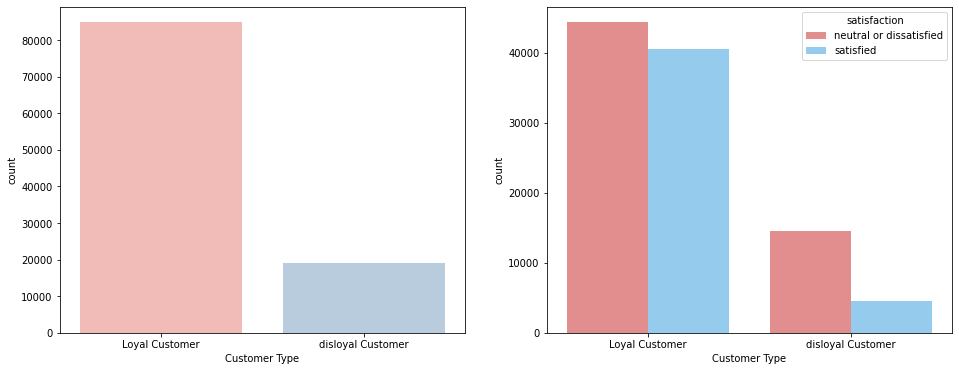

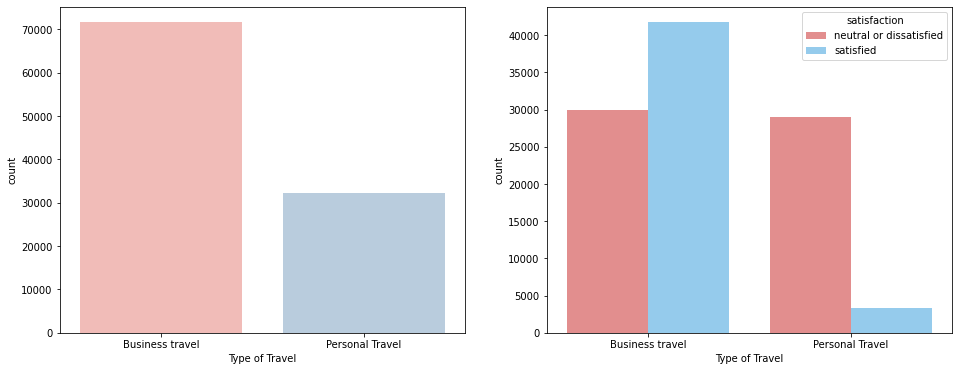

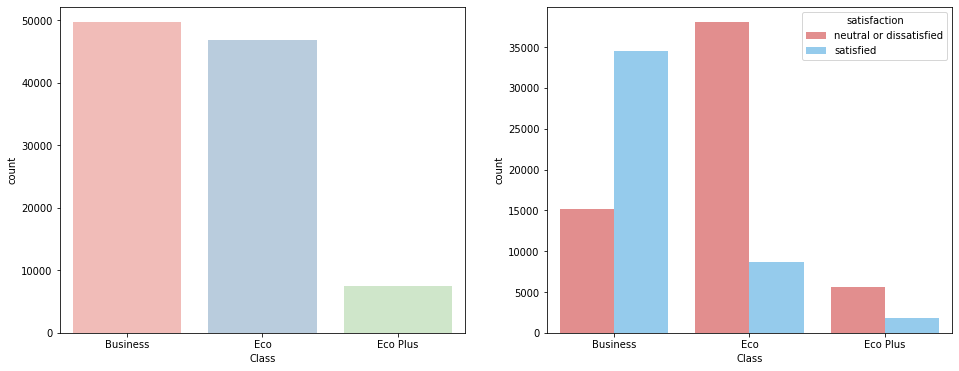

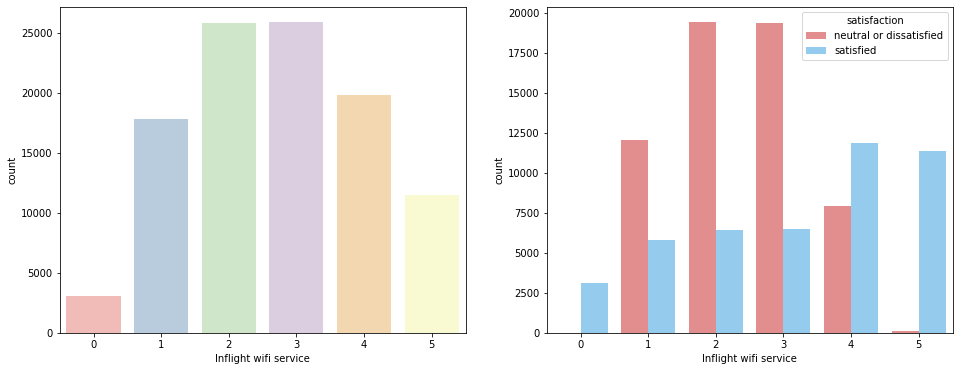

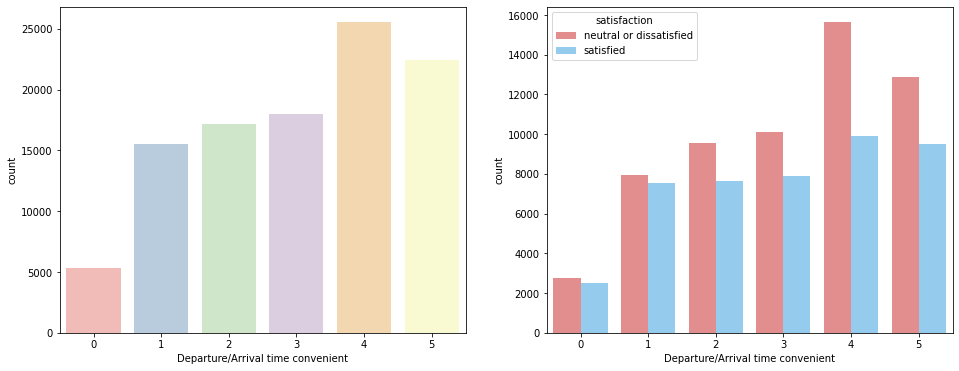

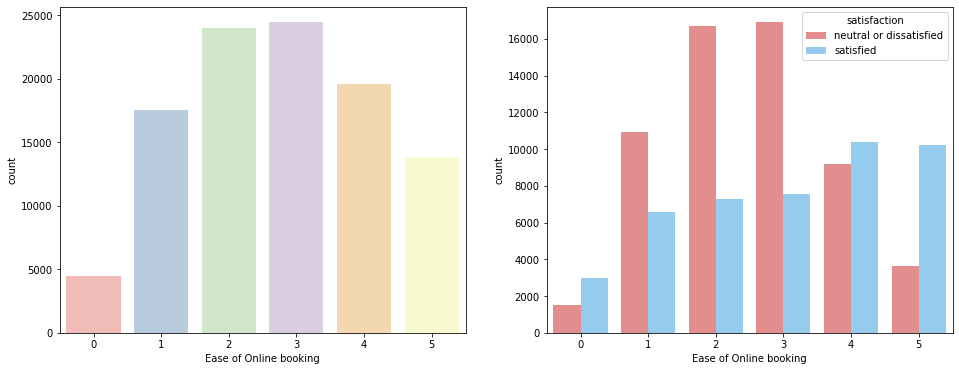

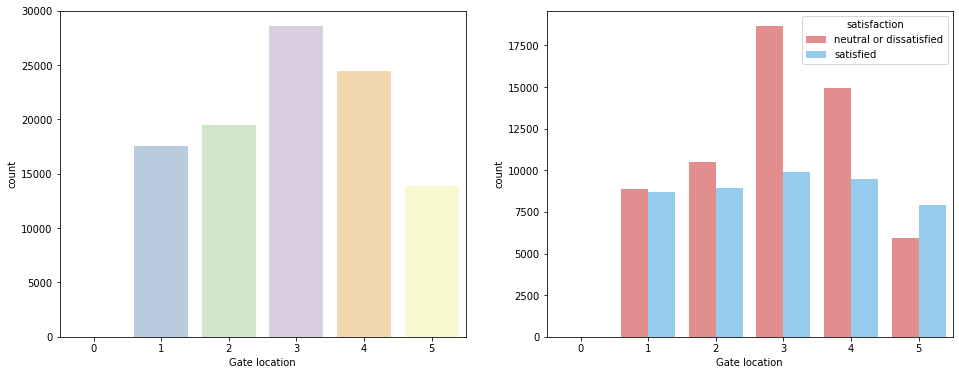

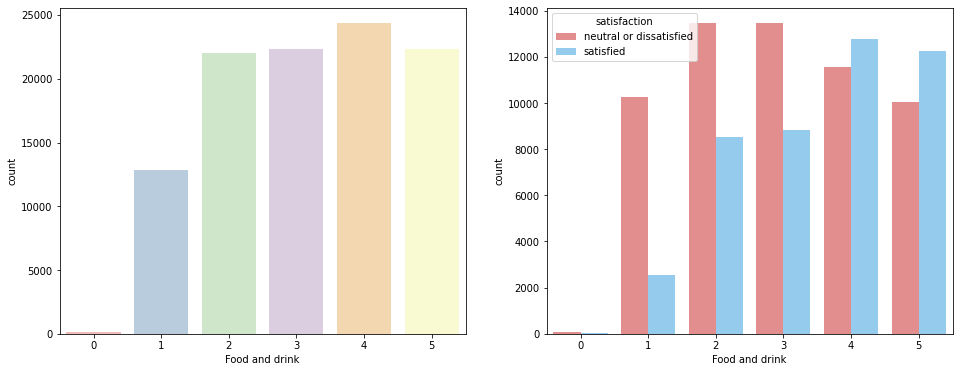

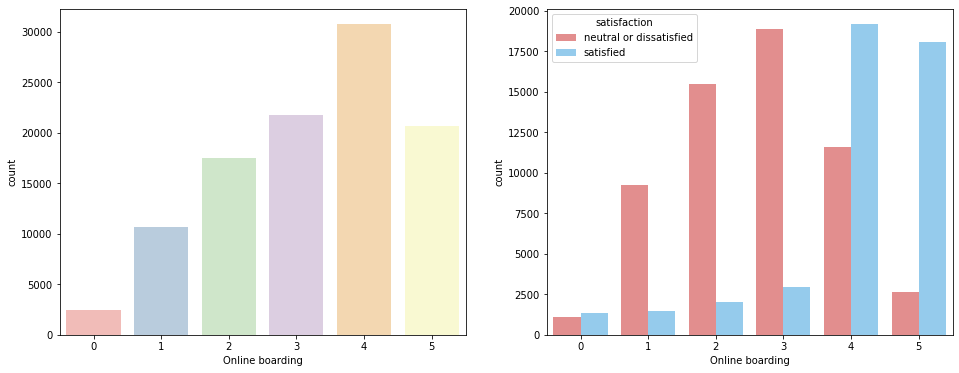

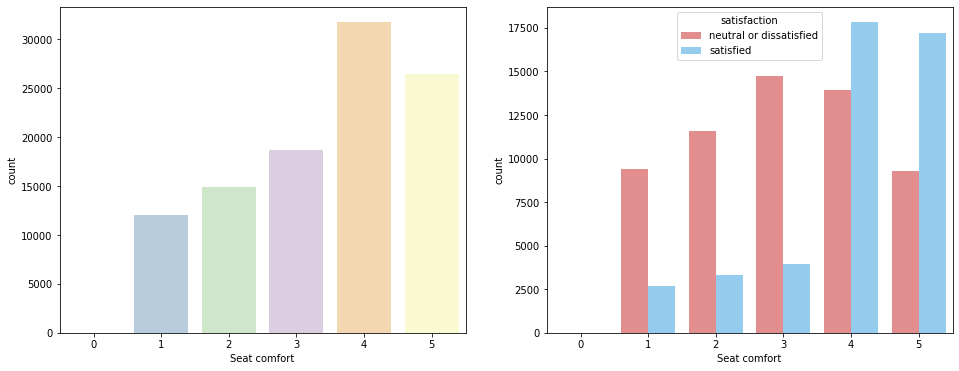

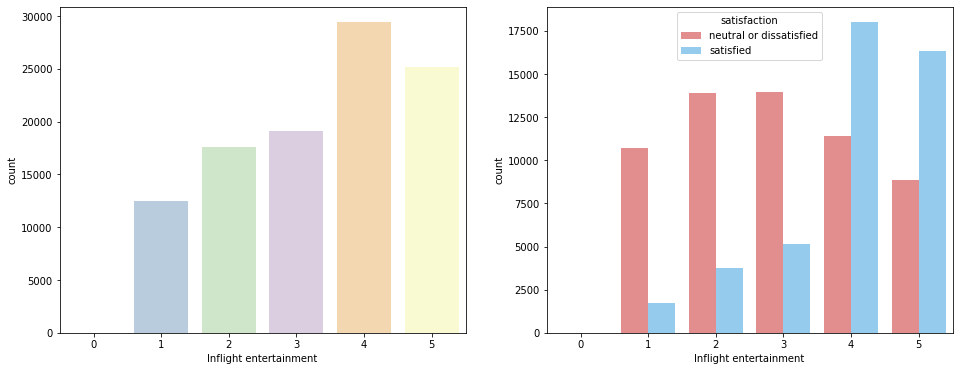

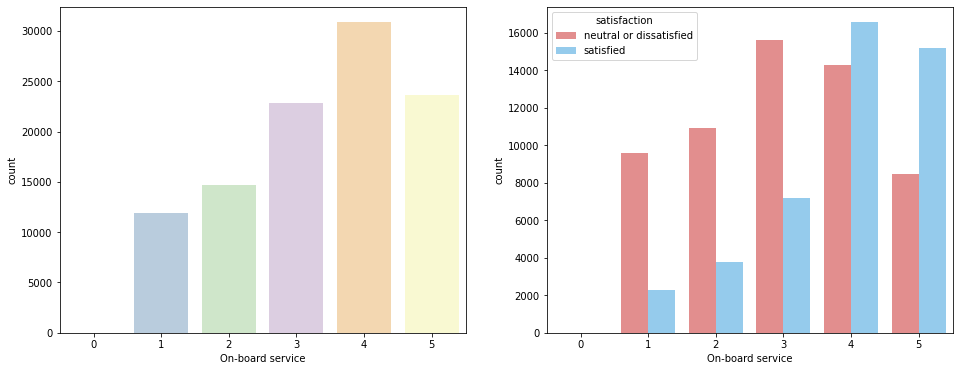

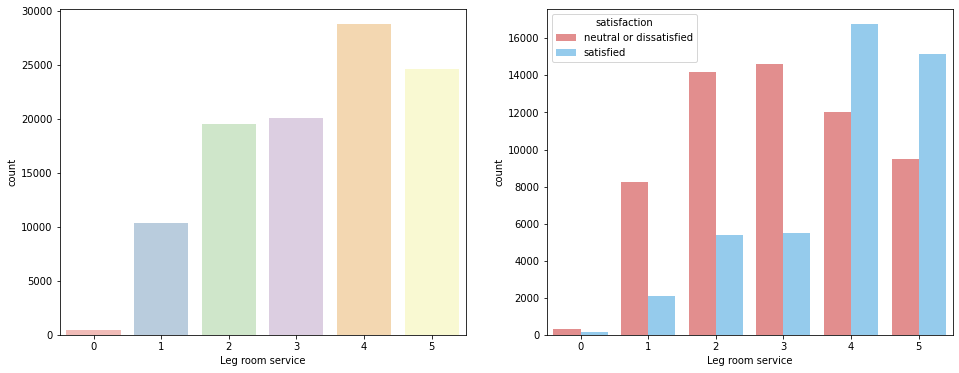

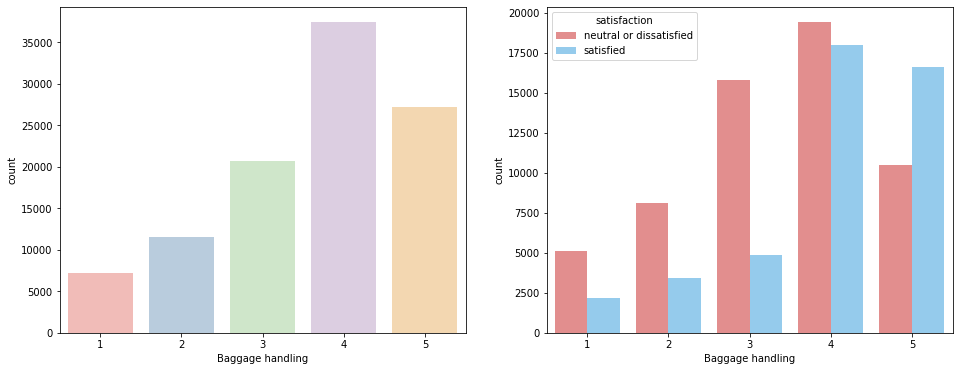

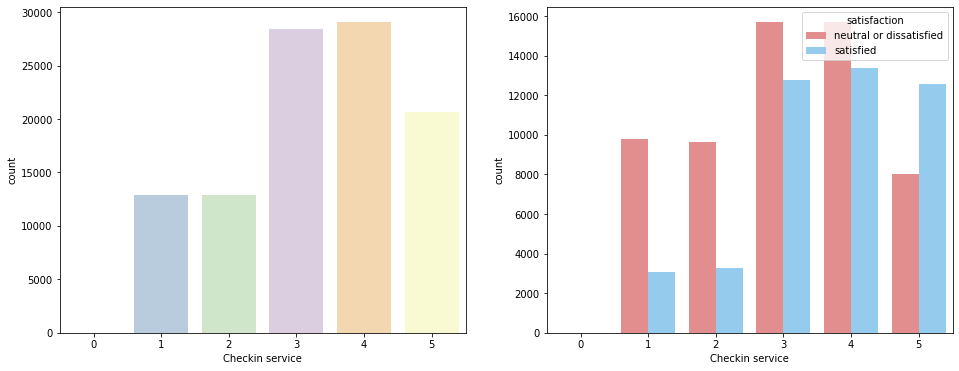

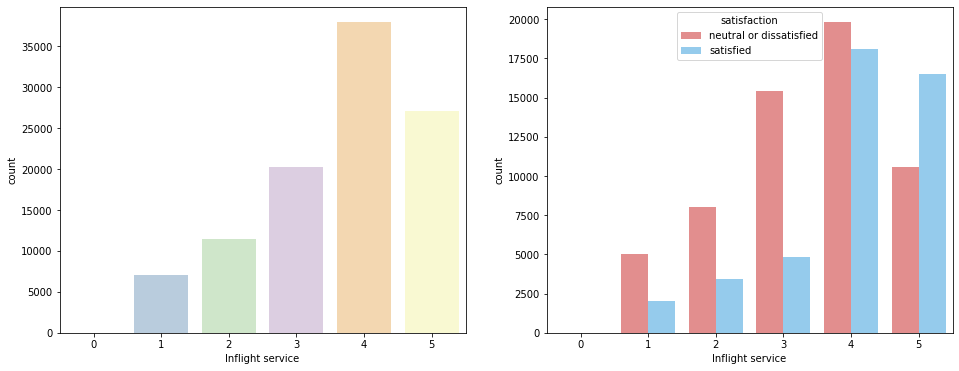

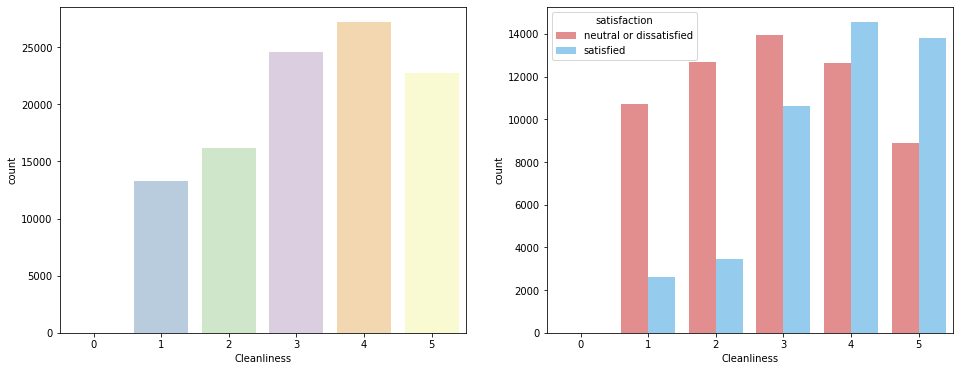

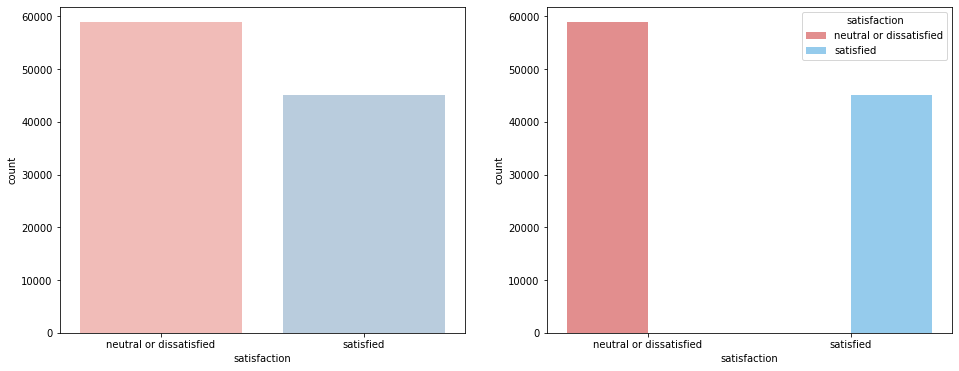

In [ ]:
var_categorical = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient',
'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service',
 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']
for i in var_categorical:
  plt.figure(figsize=(16,6))
  plt.subplot(1,2,1)
  sns.countplot(x=df[i],palette="Pastel1")

  plt.subplot(1,2,2)
  sns.countplot(x=df[i],hue=df.satisfaction, palette=["#f08080","#87cefa"])
  plt.show()

* O número de homens e mulheres nesta amostra é aproximadamente o mesmo.
* A maioria dos clientes voou por razões profissionais e não pessoais.
* Metade dos passageiros estavm em business class
* Mais de 60% dos passageiros ficaram satisfeitos com o serviço de transporte de bagagem (classificação 4-5 em 5)

Box diagrams

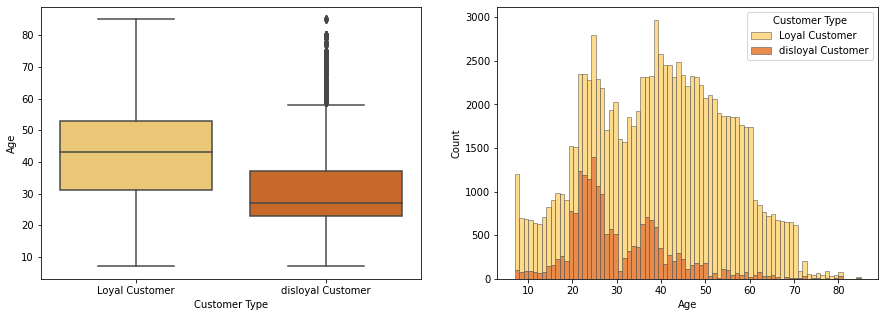

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "YlOrBr", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Customer Type", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

Concluimos que a maioria dos clientes regulares estão entre 30 e 50 anos. A de não regulares esta entre 25 e 30 anos.

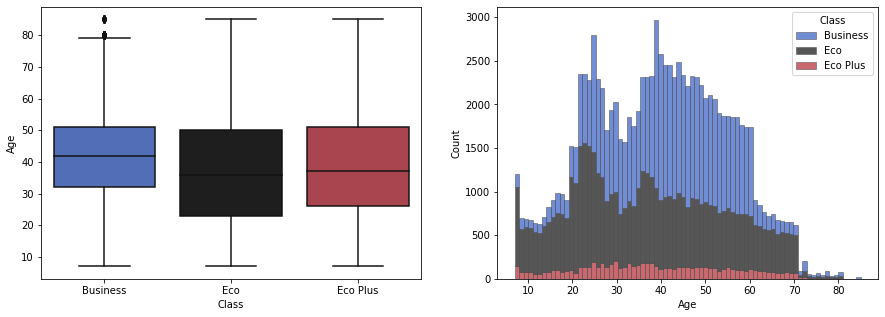

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", palette = "icefire", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Class", multiple = "stack", palette = "icefire", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

É observado que a faixa etária de clientes que viajam em classe executiva é a mesma da de clientes regulares.

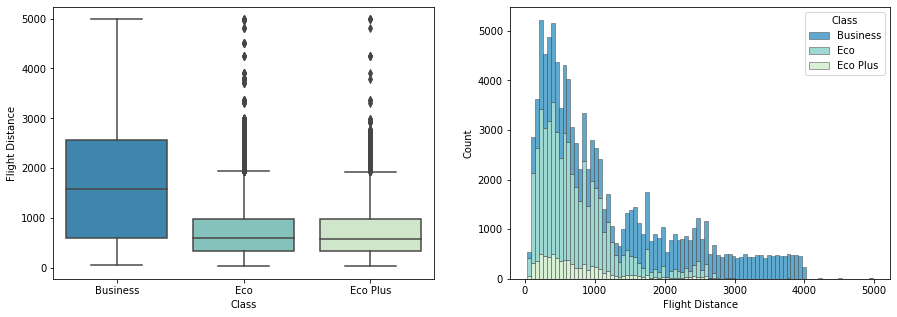

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "GnBu_r", data = df, ax = ax[0])
sns.histplot(df, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "GnBu_r", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

Pelo diagrama, clientes cuja distância de voo é longa, na sua maioria voam em classe executiva.

Agora considerando as dependências gráficas de algumas variáveis categóricas

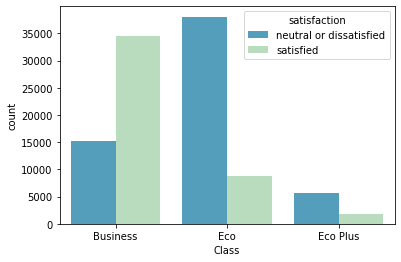

In [ ]:
sns.countplot(x='Class',hue = 'satisfaction', palette = "GnBu_r", data=df)
plt.show()

É visivel que a maioria dos passageiros que voaram na Eco Class e na Eco Plus não ficaram satisfeitos.

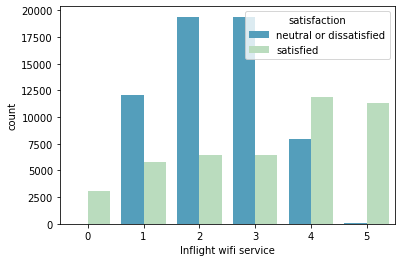

In [ ]:
sns.countplot(x='Inflight wifi service',hue = 'satisfaction', palette = "GnBu_r", data=df)

Podemos notar que os clientes que classificaram em 5 de 5 estavam bastante satisfeitos.

## Teste de hipotese

In [ ]:
from scipy import stats

### O atraso no voo se relaciona com a satisfação do cliente?

* H0: As variáveos `Arrival Delay in Minutes` e `Satisfaction` são indepentes
* HA: As variáveis não são independentes

Vamos utilizar o nivel de confiança em 95%.

In [ ]:
df2 = df.copy()
df2['Arrival Delay in Minutes'] = pd.cut(df2['Arrival Delay in Minutes'], 10)
df2['Arrival Delay in Minutes']

0         (-1.584, 158.4]
1         (-1.584, 158.4]
2         (-1.584, 158.4]
3         (-1.584, 158.4]
4         (-1.584, 158.4]
               ...       
103899    (-1.584, 158.4]
103900    (-1.584, 158.4]
103901    (-1.584, 158.4]
103902    (-1.584, 158.4]
103903    (-1.584, 158.4]
Name: Arrival Delay in Minutes, Length: 103904, dtype: category
Categories (10, interval[float64, right]): [(-1.584, 158.4] < (158.4, 316.8] < (316.8, 475.2] <
                                            (475.2, 633.6] ... (950.4, 1108.8] <
                                            (1108.8, 1267.2] < (1267.2, 1425.6] < (1425.6, 1584.0]]

In [ ]:
df2['Arrival Delay in Minutes'].value_counts()

(-1.584, 158.4]     102397
(158.4, 316.8]        1288
(316.8, 475.2]         182
(475.2, 633.6]          21
(633.6, 792.0]           7
(792.0, 950.4]           4
(950.4, 1108.8]          3
(1267.2, 1425.6]         1
(1425.6, 1584.0]         1
(1108.8, 1267.2]         0
Name: Arrival Delay in Minutes, dtype: int64

In [ ]:
df2['Arrival Delay in Minutes'] = df2['Arrival Delay in Minutes'].astype('category')

In [ ]:
df2['Arrival Delay in Minutes'].cat.codes.unique()

array([0, 1, 2, 8, 4, 3, 5, 6, 9], dtype=int8)

In [ ]:
contigency = pd.crosstab(df2['Arrival Delay in Minutes'], df2['satisfaction'])
contigency

satisfaction,neutral or dissatisfied,satisfied
Arrival Delay in Minutes,,
"(-1.584, 316.8]",58745,44940
"(316.8, 633.6]",123,80
"(633.6, 950.4]",8,3
"(950.4, 1267.2]",2,1
"(1267.2, 1584.0]",1,1


In [ ]:
contigency_pct = pd.crosstab(df2['Arrival Delay in Minutes'], df2['satisfaction'], normalize='index')
contigency_pct

satisfaction,neutral or dissatisfied,satisfied
Arrival Delay in Minutes,,
"(-1.584, 316.8]",0.566572,0.433428
"(316.8, 633.6]",0.605911,0.394089
"(633.6, 950.4]",0.727273,0.272727
"(950.4, 1267.2]",0.666667,0.333333
"(1267.2, 1584.0]",0.500000,0.500000


In [ ]:
_, p, _, _ = stats.chi2_contingency(contigency)
p

0.628437232695223

Como tivemos a probabilidade em 62% significa que não podemos negar a hipotese nula

### `Arrival Delay in Minutes` é normal?

H0: A população é normalmente distribuida
H1: A população não é normalmente distruibuida

In [ ]:
stats.shapiro(df['Arrival Delay in Minutes'])

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.4271466135978699, pvalue=0.0)

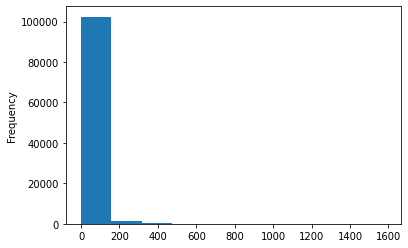

In [ ]:
df['Arrival Delay in Minutes'].plot(kind='hist')

Como o pvalue = 0.0 podemos negar a hipotese nula.